<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yaml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yaml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/heatmaps.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/guides/heatmaps">Heatmap Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://pepy.tech/project/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [ ]:
%pip install ultralytics
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


# Introduction to Heatmaps

A heatmap generated with [Ultralytics YOLOv8](https://github.com/ultralytics/ultralytics/) transforms complex data into a vibrant, color-coded matrix. This visual tool employs a spectrum of colors to represent varying data values, where warmer hues indicate higher intensities and cooler tones signify lower values. Heatmaps excel in visualizing intricate data patterns, correlations, and anomalies, offering an accessible and engaging approach to data interpretation across diverse domains.

## Real World Applications

|                                                                 Transportation                                                                  |                                                                 Retail                                                                  |
|:-----------------------------------------------------------------------------------------------------------------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|
| ![Ultralytics YOLOv8 Transportation Heatmap](https://github.com/RizwanMunawar/ultralytics/assets/62513924/288d7053-622b-4452-b4e4-1f41aeb764aa) | ![Ultralytics YOLOv8 Retail Heatmap](https://github.com/RizwanMunawar/ultralytics/assets/62513924/edef75ad-50a7-4c0a-be4a-a66cdfc12802) |
|                                                    Ultralytics YOLOv8 Transportation Heatmap                                                    |                                                    Ultralytics YOLOv8 Retail Heatmap                                                    |


In [ ]:
import cv2

from ultralytics import YOLO, solutions

# Load YOLO model
model = YOLO("yolov8n.pt")

# Open video file
cap = cv2.VideoCapture("path/to/video/file.mp4")
assert cap.isOpened(), "Error reading video file"

# Get video properties
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Initialize video writer
video_writer = cv2.VideoWriter("heatmap_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize heatmap object
heatmap_obj = solutions.Heatmap(
    colormap=cv2.COLORMAP_PARULA,
    view_img=True,
    shape="circle",
    classes_names=model.names,
)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    # Perform tracking on the current frame
    tracks = model.track(im0, persist=True, show=False)

    # Generate heatmap on the frame
    im0 = heatmap_obj.generate_heatmap(im0, tracks)

    # Write the frame to the output video
    video_writer.write(im0)

# Release resources
cap.release()
video_writer.release()
cv2.destroyAllWindows()

# Additional Resources

## Community Support

For more information on using heatmaps with Ultralytics, you can explore the comprehensive [Ultralytics Heatmaps Docs](https://docs.ultralytics.com/guides/heatmaps/). This guide covers everything from basic concepts to advanced techniques, ensuring you get the most out of your heatmap visualizations.

## Ultralytics ⚡ Resources

At Ultralytics, we are committed to providing cutting-edge AI solutions. Here are some key resources to learn more about our company and get involved with our community:

- [Ultralytics HUB](https://ultralytics.com/hub): Simplify your AI projects with Ultralytics HUB, our no-code tool for effortless YOLO training and deployment.
- [Ultralytics Licensing](https://ultralytics.com/license): Review our licensing terms to understand how you can use our software in your projects.
- [About Us](https://ultralytics.com/about): Discover our mission, vision, and the story behind Ultralytics.
- [Join Our Team](https://ultralytics.com/work): Explore career opportunities and join our team of talented professionals.

## YOLOv8 🚀 Resources

YOLOv8 is the latest evolution in the YOLO series, offering state-of-the-art performance in object detection and image segmentation. Here are some essential resources to help you get started with YOLOv8:

- [GitHub](https://github.com/ultralytics/ultralytics): Access the YOLOv8 repository on GitHub, where you can find the source code, contribute to the project, and report issues.
- [Docs](https://docs.ultralytics.com/): Explore the official documentation for YOLOv8, including installation guides, tutorials, and detailed API references.
- [Discord](https://ultralytics.com/discord): Join our Discord community to connect with other users, share your projects, and get help from the Ultralytics team.

These resources are designed to help you leverage the full potential of Ultralytics' offerings and YOLOv8. Whether you're a beginner or an experienced developer, you'll find the information and support you need to succeed.

[YOLOv8-Explainer 0.0.5](https://pypi.org/project/YOLOv8-Explainer/)

In [8]:
!pip install YOLOv8-Explainer

YOLOv8s summary: 225 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs


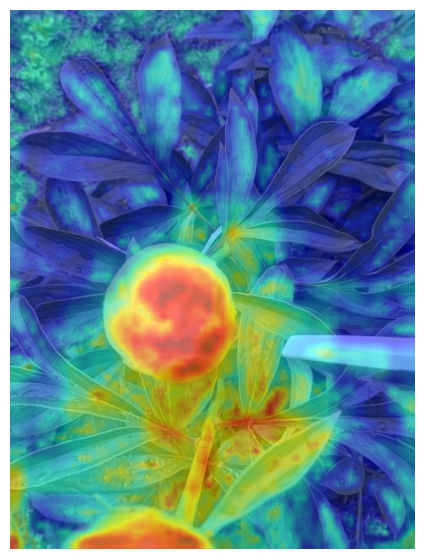

In [12]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/content/yolov8s.pt",
        conf_threshold=0.4,
        #device = "cpu",
        method = "EigenCAM",
        layer=[10, 12, 14, 16, 18, -3],
        #backward_type="all",
        ratio=0.02,
        show_box=False,
        renormalize=False,
)

imagelist = model(
    img_path="/content/001 (2).jpg",
    )

display_images(imagelist)